# Object Recognition
### The CIFAR-10 dataeset
[Reference](https://www.cs.toronto.edu/~kriz/cifar.html) 
This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

### Downloading the required files from drive to local repo

In [4]:
! gdown --id 1R4qK79R1mrHljwcv9pVi3Kt6AGCWN2c3 #trnImage.npy
! gdown --id 1WFBb-C97PxmzbS2n7x-w0JYJrtIOga0I #tstImage.npy
! gdown --id 1AbSLluy5OavejGx-Eqm5uXH1XPorYy6b #trnLabel_coarse.npy
! gdown --id 1qIEzHgbR7nd3MbOv1yX5JAXDZl8YmHg8 #trnLabel_fine.npy
! gdown --id 1zW80bJN8UJ0WwM8kdlfS5zP05gZLprMB #tstLabel_coarse.npy
! gdown --id 1L__jSEmCKnEocO_1d5kPLDyzESet5AXA #tstImage.npy
! gdown --id 1-UwPSEVYn3jsIKA6mMPm4sh8nbbKZEM_ #fine_labels.csv
! gdown --id 1b1H402NtestUdsojQIAEUdu78TfCRe-U #coarse_labels.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1R4qK79R1mrHljwcv9pVi3Kt6AGCWN2c3
To: /content/trnImage.npy
100% 614M/614M [00:05<00:00, 105MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1WFBb-C97PxmzbS2n7x-w0JYJrtIOga0I
To: /content/tstImage.npy
100% 123M/123M [00:02<00:00, 55.2MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https:

## Load data and get a single image as an example
Here we load in the training data, and the fine and coarse training labels.

In [5]:
images = np.load('./trnImage.npy')
label_fine = np.load('./trnLabel_fine.npy')
label_coarse = np.load('./trnLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Images Fine Labels Shape: {label_fine.shape}')
print(f'Images Coarse Labels Shape: {label_coarse.shape}')


Images Shape: (32, 32, 3, 50000)
Images Fine Labels Shape: (50000,)
Images Coarse Labels Shape: (50000,)


The above shape of the data is Height × Width × Channel × Samples. Ordering such that samples are along the first axis (Samples × Height × Width × Channel) using [transpose](https://www.tensorflow.org/api_docs/python/tf/transpose).

In [6]:
type(images)
# Calling transpose on our 4D tensor
transposed = np.transpose(images, [3,0,1,2])
print(f'Shape of transposed: {transposed.shape}')

Shape of transposed: (50000, 32, 32, 3)


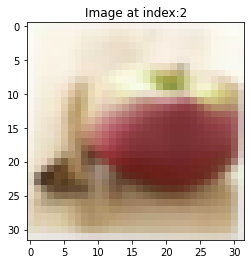

In [7]:
image_index = 2 # pick a specific image
image = images[:, :, :, image_index]
#Sample image
plt.figure()
# plt.subplot()
plt.imshow(image)#(images[:, :, :, 0])
plt.title(f'Image at index:{image_index}')
plt.show()

#### Checking the unique fine labels

In [8]:
# Checking unique values for the model
fine_label , counts = np.unique(label_fine, return_counts = True)
print(np.asarray((fine_label, counts)).T)

[[  0 500]
 [  1 500]
 [  2 500]
 [  3 500]
 [  4 500]
 [  5 500]
 [  6 500]
 [  7 500]
 [  8 500]
 [  9 500]
 [ 10 500]
 [ 11 500]
 [ 12 500]
 [ 13 500]
 [ 14 500]
 [ 15 500]
 [ 16 500]
 [ 17 500]
 [ 18 500]
 [ 19 500]
 [ 20 500]
 [ 21 500]
 [ 22 500]
 [ 23 500]
 [ 24 500]
 [ 25 500]
 [ 26 500]
 [ 27 500]
 [ 28 500]
 [ 29 500]
 [ 30 500]
 [ 31 500]
 [ 32 500]
 [ 33 500]
 [ 34 500]
 [ 35 500]
 [ 36 500]
 [ 37 500]
 [ 38 500]
 [ 39 500]
 [ 40 500]
 [ 41 500]
 [ 42 500]
 [ 43 500]
 [ 44 500]
 [ 45 500]
 [ 46 500]
 [ 47 500]
 [ 48 500]
 [ 49 500]
 [ 50 500]
 [ 51 500]
 [ 52 500]
 [ 53 500]
 [ 54 500]
 [ 55 500]
 [ 56 500]
 [ 57 500]
 [ 58 500]
 [ 59 500]
 [ 60 500]
 [ 61 500]
 [ 62 500]
 [ 63 500]
 [ 64 500]
 [ 65 500]
 [ 66 500]
 [ 67 500]
 [ 68 500]
 [ 69 500]
 [ 70 500]
 [ 71 500]
 [ 72 500]
 [ 73 500]
 [ 74 500]
 [ 75 500]
 [ 76 500]
 [ 77 500]
 [ 78 500]
 [ 79 500]
 [ 80 500]
 [ 81 500]
 [ 82 500]
 [ 83 500]
 [ 84 500]
 [ 85 500]
 [ 86 500]
 [ 87 500]
 [ 88 500]
 [ 89 500]
 [ 90 500]

As mentioned there are 100 categories each having 500 samples.

#### Checking the coarse labels 20 super classes:

In [9]:
# Checking unique values for the model
coarse_label , counts = np.unique(label_coarse, return_counts = True)
print(np.asarray((coarse_label, counts)).T)

[[   0 2500]
 [   1 2500]
 [   2 2500]
 [   3 2500]
 [   4 2500]
 [   5 2500]
 [   6 2500]
 [   7 2500]
 [   8 2500]
 [   9 2500]
 [  10 2500]
 [  11 2500]
 [  12 2500]
 [  13 2500]
 [  14 2500]
 [  15 2500]
 [  16 2500]
 [  17 2500]
 [  18 2500]
 [  19 2500]]


#### Assigning to usual terminology

In [10]:
trainX = transposed
trainY = label_coarse
testX = np.transpose(np.load('./tstImage.npy'),[3,0,1,2])
testY = np.load('./tstLabel_coarse.npy')

In [11]:
df = pd.read_csv('coarse_labels.csv')
df.head

<bound method NDFrame.head of Empty DataFrame
Columns: [aquatic mammals, fish, flowers, food containers, fruit and vegetables, household electrical devices, household furniture, insects, large carnivores, large man-made outdoor things, large natural outdoor scenes, large omnivores and herbivores, medium-sized mammals, non-insect invertebrates, people, reptiles, small mammals, trees, vehicles 1, vehicles 2]
Index: []>

In [12]:
df.columns

Index(['aquatic mammals', 'fish', 'flowers', 'food containers',
       'fruit and vegetables', 'household electrical devices',
       'household furniture', 'insects', 'large carnivores',
       'large man-made outdoor things', 'large natural outdoor scenes',
       'large omnivores and herbivores', 'medium-sized mammals',
       'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
       'trees', 'vehicles 1', 'vehicles 2'],
      dtype='object')

In [13]:
# type(trainY),trainY.shape
print(type(list(label_coarse)))
superclass = list(label_coarse)
print(len(superclass))

<class 'list'>
50000


In [14]:
supCategory = pd.DataFrame(df.columns, columns=['SupClass'])
supCategoryDict = supCategory.to_dict()

In [15]:
supCategoryDict

{'SupClass': {0: 'aquatic mammals',
  1: 'fish',
  2: 'flowers',
  3: 'food containers',
  4: 'fruit and vegetables',
  5: 'household electrical devices',
  6: 'household furniture',
  7: 'insects',
  8: 'large carnivores',
  9: 'large man-made outdoor things',
  10: 'large natural outdoor scenes',
  11: 'large omnivores and herbivores',
  12: 'medium-sized mammals',
  13: 'non-insect invertebrates',
  14: 'people',
  15: 'reptiles',
  16: 'small mammals',
  17: 'trees',
  18: 'vehicles 1',
  19: 'vehicles 2'}}

#### Applying one hot enccoding. 
- https://keras.io/layers/recurrent/

In [16]:
# one hot encode target values
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [17]:
print(trainY.shape)
print(testY.shape)

(50000, 20)
(10000, 20)


In [18]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, train_size=0.8)

#### To normalize the pixels
Reference:
- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

In [19]:
# scale pixels
def prep_data(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

## Method 1 - with 3 blocks of CNN

### Building the model on Coarse Label

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout
from keras.layers import Flatten

Stack convolutional layers with 3x3 kernels followed by a max pooling layer. This forms a block which can be repeated with increasing number of filters.<br>We use padding so that the height and width of the output feature maps matches with inputs.<br>References: 
- https://keras.io/guides/sequential_model/
- https://www.activestate.com/resources/quick-reads/what-is-a-keras-model/


#### This defines the feature detector part of the model

Loading the pre-fit model CNN1

In [21]:
# ! gdown --id 1g8yGWHk5P96eGQjaUfFWsiwCkmWvih3Y #h5 file
# model.load('CNN1.h5')
# ! gdown --id 1P6oP9NcfP5MYmv9l5W7njy7yoWuOc4-P #h5 file
# model.load('CNN_cat1.h5')
# ! gdown --id 1Xgl5Sd_uI6VnwXRXw-o_ew_eCGkzuUpd #h5 file
# model1.load('CNN_cat2.h5')
# ! gdown --id 1_MvnukkkhK_LdIJtuLqTwHZWhCxlJfDe #h5 file
# model2.load('CNN_Dropout_cat2.h5')

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

#### Dense Layer
This layer helps in changing the dimensionality of the output from the preceding layer so that the model can easily define the relationship between the values of the data in which the model is working.<br>
References: 
- [Keras Dense Layer Explained for Beginners](https://machinelearningknowledge.ai/keras-dense-layer-explained-for-beginners/)

- [Dense layer in keras](https://keras.io/api/layers/core_layers/dense/)

- [DataCamp - Keras and Dense](https://www.youtube.com/watch?v=oJ1i2c1KxKk)

- [Understanding Dense Layers](https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/)


In [23]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))

#### Compiling the model

In [24]:
# compile model
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


#### Fitting the model:

In [25]:
history = model.fit(trainX, trainY, epochs=100, batch_size=64, 
                    validation_data=(valX, valY), verbose=0)

In [26]:
# model.save("CNN1.h5")
# model.save("CNN_cat1.h5")

Plot history FUNCTION
Reference:
- https://www.kaggle.com/code/clarillapanilla/cifar-100-cnn

In [27]:
def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
    plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
    plt.title ('Training and validation accuracy')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

    plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
    plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
    plt.title ('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

#### History

313/313 - 2s - loss: 6.5830 - accuracy: 0.4855 - 2s/epoch - 7ms/step
test accuracy:  0.4855000078678131


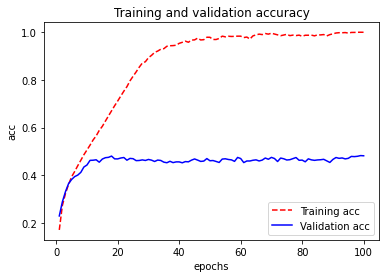

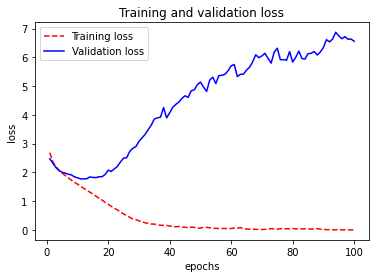

<Figure size 432x288 with 0 Axes>

In [28]:
plot_history(history)
test_loss,test_acc=model.evaluate(testX, testY, verbose=2)
print("test accuracy: ",test_acc)

#### ACCURACY

In [29]:
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 48.550


#### Plot the confusion matrix

Reference:
- https://www.kaggle.com/code/clarillapanilla/cifar-100-cnn

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
testY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.tight_layout()
    plt.ylabel('Observacion')
    plt.xlabel('Prediction')

Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 

In [33]:
Y_pred_classes

array([18, 16,  0, ..., 15, 16, 13])

In [34]:
testY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [35]:
testY_orig = np.load('./tstLabel_coarse.npy')
testY_orig

array([10, 10,  0, ...,  4,  8,  2])

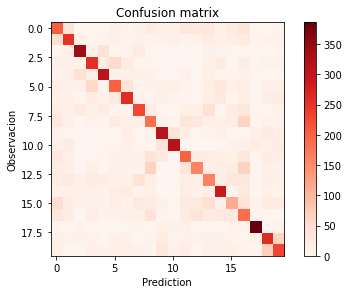

In [36]:
confusion_mtx = confusion_matrix(testY_orig, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(100))

The diagonal denotes the correct predictions, here observed image and the predicted image are equal. The line indicates that many images are predicted correctly on coarse labels(~50 percent)

In [37]:
idx,counts =np.unique(Y_pred_classes,return_counts=True,axis=0)
np.unique(Y_pred_classes,return_counts=True,axis=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([548, 538, 524, 516, 519, 478, 492, 459, 498, 540, 453, 489, 383,
        500, 546, 365, 636, 499, 530, 487]))

In [38]:
print('CLASSES CHOOSEN MANY TIMES')
for number in range(idx.shape[0]):
    clase=idx[number]
    if counts[number]>500:
        print('clase: ' +(str(supCategoryDict['SupClass'][clase]))+' ('+str(clase) +') counts: '+str(counts[number]))

CLASSES CHOOSEN MANY TIMES
clase: aquatic mammals (0) counts: 548
clase: fish (1) counts: 538
clase: flowers (2) counts: 524
clase: food containers (3) counts: 516
clase: fruit and vegetables (4) counts: 519
clase: large man-made outdoor things (9) counts: 540
clase: people (14) counts: 546
clase: small mammals (16) counts: 636
clase: vehicles 1 (18) counts: 530


In [39]:
print('CLASSES NOT CHOOSEN')
for all_classes in range(20):
    found=False
    for i in range(idx.shape[0]):
        if all_classes==idx[i]:
            found=True
    if found==False:
        print('clase: ' +(str(supCategoryDict['SupClass'][all_classes]))+' ('+str(all_classes) +') counts: '+str(0))

CLASSES NOT CHOOSEN


Above indicates that all superclasses were chosen.

#### Predictions (Coarse - Superclass)


In [40]:
testY_orig

array([10, 10,  0, ...,  4,  8,  2])

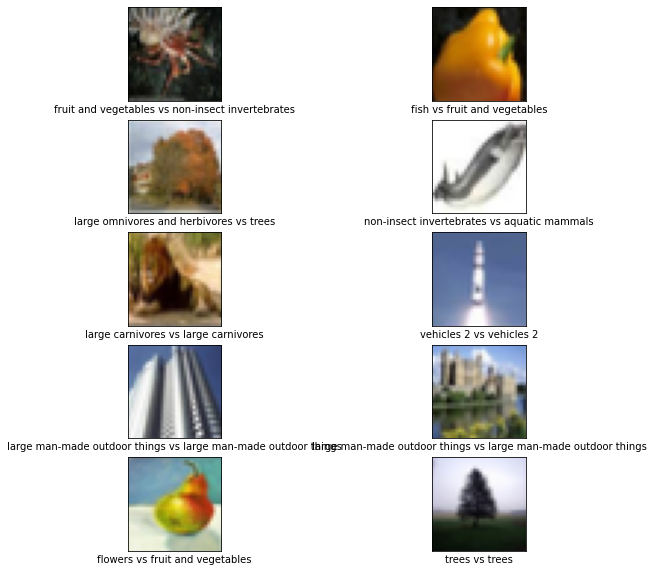

In [41]:
plt.figure(figsize=(10,10))
for image in range(0,10):
    i=image
    # plt.subplot(3,3,i+1)
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+100# add 25 by 25 to change the photo block
    data_plot = testX[j]
    plt.imshow(data_plot)
    plt.xlabel(str(supCategoryDict['SupClass'][Y_pred_classes[j]]) + " vs " + str(supCategoryDict['SupClass'][testY_orig[j]]))
plt.show()

### Building the model on *fine classes*

In [42]:
trainX = transposed
trainY = label_fine
testY = np.load('./tstLabel_fine.npy')
df1 = pd.read_csv('fine_labels.csv')
df1.head
df1.columns

# type(trainY),trainY.shape
print(type(list(label_fine)))
subclass = list(label_fine)
print(len(subclass))

subCategory = pd.DataFrame(df1.columns, columns=['SubClass'])
subCategoryDict = subCategory.to_dict()
subCategoryDict

<class 'list'>
50000


{'SubClass': {0: 'apples',
  1: 'aquarium fish',
  2: 'baby',
  3: 'bear',
  4: 'beaver',
  5: 'bed',
  6: 'bee',
  7: 'beetle',
  8: 'bicycle',
  9: 'bottles',
  10: 'bowls',
  11: 'boy',
  12: 'bridge',
  13: 'bus',
  14: 'butterfly',
  15: 'camel',
  16: 'cans',
  17: 'castle',
  18: 'caterpillar',
  19: 'cattle',
  20: 'chair',
  21: 'chimpanzee',
  22: 'clock',
  23: 'cloud',
  24: 'cockroach',
  25: 'couch',
  26: 'crab',
  27: 'crocodile',
  28: 'cups',
  29: 'dinosaur',
  30: 'dolphin',
  31: 'elephant',
  32: 'flatfish',
  33: 'forest',
  34: 'fox',
  35: 'girl',
  36: 'hamster',
  37: 'house',
  38: 'kangaroo',
  39: 'keyboard',
  40: 'lamp',
  41: 'lawn-mower',
  42: 'leopard',
  43: 'lion',
  44: 'lizard',
  45: 'lobster',
  46: 'man',
  47: 'maple',
  48: 'motorcycle',
  49: 'mountain',
  50: 'mouse',
  51: 'mushrooms',
  52: 'oak',
  53: 'oranges',
  54: 'orchids',
  55: 'otter',
  56: 'palm',
  57: 'pears',
  58: 'pickup truck',
  59: 'pine',
  60: 'plain',
  61: 'plates

In [43]:
# one hot encode target values
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [44]:
print(trainX.shape)
print(trainY.shape)
print(testY.shape)

(50000, 32, 32, 3)
(50000, 100)
(10000, 100)


In [45]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, train_size=0.8)

In [46]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(100, activation='softmax'))

# compile model
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [47]:
history2 = model1.fit(trainX, trainY, epochs=100, batch_size=64, 
                    validation_data=(valX, valY), verbose=0)

In [48]:
model1.save("CNN_cat2.h5")

In [49]:
testX = np.transpose(np.load('./tstImage.npy'),[3,0,1,2])

In [50]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(40000, 32, 32, 3)
(40000, 100)
(10000, 32, 32, 3)
(10000, 100)


In [51]:
testY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### History and ACCURACY

313/313 - 2s - loss: 9.5897 - accuracy: 0.3638 - 2s/epoch - 6ms/step
test accuracy:  0.3637999892234802


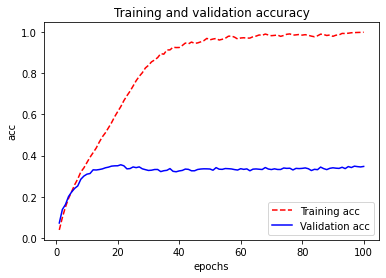

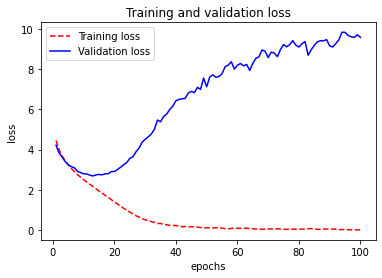

<Figure size 432x288 with 0 Axes>

In [52]:
plot_history(history2)
test_loss,test_acc=model1.evaluate(testX, testY, verbose=2)
print("test accuracy: ",test_acc)

In [53]:
# evaluate model
_, acc = model1.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 36.380


In [54]:
testY_orig = np.load('./tstLabel_fine.npy')
testY_orig

array([49, 33, 72, ..., 51, 42, 70])

#### Confusion matrix for finer classes

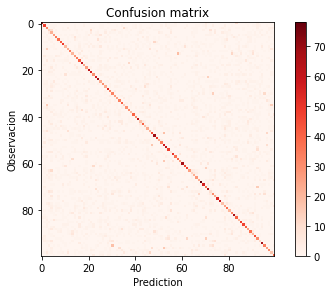

In [55]:
Y_pred = model1.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
confusion_mtx = confusion_matrix(testY_orig, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(100))

#### ANALYSIS ON FINER CLASSES PREDICTION

In [56]:
idx,counts =np.unique(Y_pred_classes,return_counts=True,axis=0)
np.unique(Y_pred_classes,return_counts=True,axis=0)

print('CLASSES CHOOSEN MANY TIMES')
for number in range(idx.shape[0]):
    clase=idx[number]
    if counts[number]>500:
        print('clase: ' +(str(subCategoryDict['SubClass'][clase]))+' ('+str(clase) +') counts: '+str(counts[number]))

CLASSES CHOOSEN MANY TIMES


Classes which were  not chosen in prediction


In [57]:
print('CLASSES NOT CHOOSEN')
for all_classes in range(100):
    found=False
    for i in range(idx.shape[0]):
        if all_classes==idx[i]:
            found=True
    if found==False:
        print('clase: ' +(str(subCategoryDict['SubClass'][all_classes]))+' ('+str(all_classes) +') counts: '+str(0))

CLASSES NOT CHOOSEN


#### Predictions (Fine - Subclass)


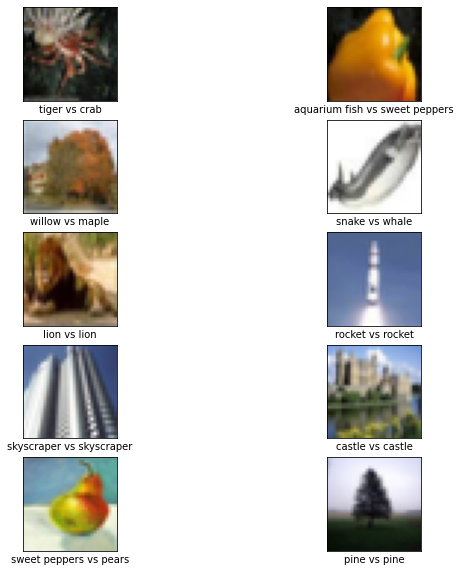

In [58]:
plt.figure(figsize=(10,10))
for image in range(0,10):
    i=image
    # plt.subplot(3,3,i+1)
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+100# add 25 by 25 to change the photo block
    data_plot = testX[j]
    plt.imshow(data_plot)
    plt.xlabel(str(subCategoryDict['SubClass'][Y_pred_classes[j]]) + " vs " + str(subCategoryDict['SubClass'][testY_orig[j]]))
plt.show()

## Method 2 with rergularization using dropout and additional dense layer

#### Compiling the model with dropout layers
References:
- https://medium.com/analytics-vidhya/a-simple-introduction-to-dropout-regularization-with-code-5279489dda1e

- https://programmathically.com/dropout-regularization-in-neural-networks-how-it-works-and-when-to-use-it/

- https://stats.stackexchange.com/questions/241645/how-to-explain-dropout-regularization-in-simple-terms

- [Dropout Regularization (C2W1L06)](https://www.youtube.com/watch?v=D8PJAL-MZv8)

- https://python-course.eu/machine-learning/dropout-neural-networks-in-python.php

We add the dropout by adding new Dropout layers, where the amount of nodes removed is specified by the parameter provided. Dropout can be added at varios places in model, in temrs of placement of the dropout and hohhw much dropot to be placed.

Here we are using the dropout layers after each max pooling layer and after the fully connected layer. Then we use a fixed dropout rate of 20% (that is retain 80% of the nodes).

In [59]:
# training a new model with dropout
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(100, activation='softmax'))

# compile model
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [60]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(40000, 32, 32, 3)
(40000, 100)
(10000, 32, 32, 3)
(10000, 100)


#### Fitting the dropout model

In [ ]:
history3 = model2.fit(trainX, trainY, epochs=100, batch_size=64, 
                    validation_data=(valX, valY), verbose=0)

In [ ]:
model2.save("CNN_Dropout_cat2.h5")

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

#### Plotting the history and ACCURACY


In [ ]:
plot_history(history3)
test_loss,test_acc=model2.evaluate(testX, testY, verbose=2)
print("test accuracy: ",test_acc)

# evaluate model
# _, acc = model2.evaluate(testX, testY, verbose=0)
print('> %.3f' % (test_acc * 100.0))

#### Dropout confusion matrix

In [ ]:
Y_pred = model2.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
confusion_mtx = confusion_matrix(testY_orig, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(100))

In [ ]:
idx,counts =np.unique(Y_pred_classes,return_counts=True,axis=0)
np.unique(Y_pred_classes,return_counts=True,axis=0)

Dropout Class analysis

In [ ]:
print('CLASSES CHOOSEN MANY TIMES')
for number in range(idx.shape[0]):
    clase=idx[number]
    if counts[number]<10:
        print('clase: ' +(str(subCategoryDict['SubClass'][clase]))+' ('+str(clase) +') counts: '+str(counts[number]))

In [ ]:
print('CLASSES NOT CHOOSEN')
for all_classes in range(100):
    found=False
    for i in range(idx.shape[0]):
        if all_classes==idx[i]:
            found=True
    if found==False:
        print('clase: ' +(str(subCategoryDict['SubClass'][all_classes]))+' ('+str(all_classes) +') counts: '+str(0))

Above implies that all classes were chosen for atleast one sample

### Prediction (dropout)

In [ ]:
plt.figure(figsize=(10,10))
for image in range(0,10):
    i=image
    # plt.subplot(3,3,i+1)
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+100# add 25 by 25 to change the photo block
    data_plot = testX[j]
    plt.imshow(data_plot)
    plt.xlabel(str(subCategoryDict['SubClass'][Y_pred_classes[j]]) + " vs " + str(subCategoryDict['SubClass'][testY_orig[j]]))
plt.show()

# CONCLUSION
METHOD 1
<br>We trained the model 2 times. Firstly, we trained the model on **coarse labels**(20 categories) and the result was pretty good, we achieved an accuracy of **50.24 percent**. And our model predicted the superclasses quite precisely as can be seen in the Prediction image. Although in the samples chosen there are some discrepancies such as aquatic mammals(whale in this case) is predicted as a vehicle 2 , which is supposed to be because of the grey shade of the whale. The model predicts very well other categories such as trees, large carnivores, large man-made outdoor things, fruit and vegetables (the crab/spider in the first image is quite disturbing). 
Secondly, we trained the same model with same layers but on the **finer labels** or on the 100 sub-categories (except that adjusted the last dense layer to the number of sub categories) and the result was stored into another model – model1. As expected, the accuracy of this model dropped significantly in comparison to the super-class trained model. We managed to achieve an accuracy of **35.74 %**. The model performed quite bad in predicting the images and on the previous same samples, we didn’t get correct predictions as to the ideal human eye. This model predicted a bicycle instead of lion and beaver instead of pears. Definitely we needed to improve this model as there were a lot of subclasses which were not chosen in prediction. Therefore we used regularization in Method 2 to improve the model performance over sub-category labels.<br><br> 
METHOD 2
<br>In this method we leveraged the regularization technique of using the **dropout layer** in or model. This required the model to be rebuilt and trained. Dropout helps us to ensure that the model does not gets biased towards a particular feature, that is, it ensures that the model performs well even in the absence of that particular feature. We added the dropout by adding new Dropout layers, where the number of nodes removed is specified by the parameter provided while calling the dropout constructor. Dropout can be added at various places in model, in terms of placement of the dropout and how much dropout to be set. We used the dropout layers after each max pooling layer and after the fully connected layer. Then we use a fixed dropout rate of 20% (that is retain 80% of the nodes). Also in this method we added an additional dense layer with dimensionality of the output space starting from 256 instead of 128. Voila ! when the model was trained we achieved an accuracy of **47.36%**. The model categorized each of the samples to at least one category. The model predicted very well in comparison to the previous model on finer sub classes. On same sample set it predicted correctly for example rocket, skyscrapers, castle, pine and unbelievably it predicted the crab as well (calculated lucky guess !). Also the model was seen significantly better as we could see that it predicted a sweet pepper (orangish-yellow) as a orange. 


### Method 3 Trying applying SVM
  SVM
Reference:
- https://github.com/mok232/CIFAR-10-Image-Classification

In [ ]:
from sklearn import svm

In [ ]:
xVal = trainX[49000:, :].astype(np.float)
yVal = np.squeeze(trainY[49000:, :])
xTrain = trainX[:49000, :].astype(np.float)
yTrain = np.squeeze(trainY[:49000, :])
yTest = np.squeeze(testY)
xTest = testX.astype(np.float)
# Show dimension for each variable
print ('Train image shape:    {0}'.format(xTrain.shape))
print ('Train label shape:    {0}'.format(yTrain.shape))
print ('Validate image shape: {0}'.format(xVal.shape))
print ('Validate label shape: {0}'.format(yVal.shape))
print ('Test image shape:     {0}'.format(xTest.shape))
print ('Test label shape:     {0}'.format(yTest.shape))

In [ ]:
print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(trainX, (trainX.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
# xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(label_coarse, (label_coarse.shape[0], -1))
xTrain, xTest = prep_data(xTrain,xTest)

SVM Model

In [ ]:
#Choosing a smaller dataset
xTrain=xTrain[:3000,:]
yTrain=trainY[:3000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)

In [ ]:
def svm_linear(c):
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc.fit(xTrain, trainY) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(xTrain)
    acc_train = np.mean(Yhat_svc_linear_train == trainY)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(xTest)
    acc_test = np.mean(Yhat_svc_linear_test == testY)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test)) 

Calling the SVM function

In [ ]:
# c_svm_linear = [0.0001,0.001,0.01,0.1,1,10,100]
c_svm_linear = [1]
acc_train_svm_linear = []
acc_test_svm_linear = []

for c in c_svm_linear:
    svm_linear(c)

plt.plot(c_svm_linear, acc_train_svm_linear,'.-',color='red')
plt.plot(c_svm_linear, acc_test_svm_linear,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

Appendix
- https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/#:~:text=VGG%20stands%20for%20Visual%20Geometry,ground%2Dbreaking%20object%20recognition%20models.
- [“Very Deep Convolutional Networks for Large-Scale Image Recognition”](https://arxiv.org/abs/1409.1556)